# Fertility Rate and Life Expectancy Analysis (U.S.)

**Authors:** Olivia Rueschhoff and Dr. Dinesh Ekanayake 

**Faculty Mentors:**  
- Dr. Dinesh Ekanayake  
- Dr. Amy Ekanayake  

---

## Project Overview

This project began as an undergraduate research effort investigating the relationship between fertility rates and life expectancy in the United States and has continued into my graduate research. The work represents the **completed undergraduate-level analysis and codebase**, which now serves as the foundation for extended modeling, refinement, and manuscript preparation at the master’s level.

The research applies statistical and time-series modeling techniques to explore long-run trends and relationships between demographic variables, with ongoing work aimed toward academic publication.

To avoid overlap with the developing manuscript, this repository presents the finalized undergraduate implementation and selected analyses, while additional extensions and results are being developed separately as part of graduate research.

---

## Data Sources

All data used in this analysis were obtained from publicly available sources on Macrotrends:

- **U.S. Fertility Rate (1950–2023).** (2023). Retrieved from Macrotrends.net  
  https://www.macrotrends.net/countries/USA/united-states/fertility-rate

- **U.S. Life Expectancy (1950–2023).** (2023). Retrieved from Macrotrends.net  
  https://www.macrotrends.net/countries/USA/united-states/life-expectancy

---

## Notes

This code reflects the finalized undergraduate research implementation. Further modeling, validation, and interpretation are ongoing as part of graduate-level research with the intent of journal submission.


In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

from scipy import stats
from sklearn.linear_model import Lasso
from sklearn.preprocessing import normalize

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence

In [2]:
# Read the dataset
df = pd.read_excel('Data2025.xlsx',header=0,sheet_name='PyDataSelect',usecols='A:K')[:65]
#df = pd.read_excel('Data2025.xlsx',header=0,sheet_name='PyData',usecols='A:P')[:65]

# Replace the missing data through interpolation
df.interpolate(method='linear',axis=0,inplace=True) 
df.head(2)

,Year,Life_Exp,Fertility,LF_Women,BS_Both,GDPC_2015,Health_GDP,Education_pp,Marriage_W,Contraceptive,Abortions
0,1960,69.84,3.443,36.0,7.657970,18991.545,5.0,4804.088240,20.3,48.0,0.0
1,1961,69.93,3.373,36.4,8.304144,19108.935,5.2,4980.048177,20.3,49.1,0.7


### Variable Selection

In [3]:
# Correlation matrix
corr=df.corr()
corr

,Year,Life_Exp,Fertility,LF_Women,BS_Both,GDPC_2015,Health_GDP,Education_pp,Marriage_W,Contraceptive,Abortions
Year,1.000000,0.987034,-0.648866,0.865704,0.997180,0.995632,0.991326,0.991397,0.992963,0.628784,0.381790
Life_Exp,0.987034,1.000000,-0.680778,0.917441,0.980662,0.976537,0.987823,0.979809,0.976884,0.675653,0.480412
Fertility,-0.648866,-0.680778,1.000000,-0.819743,-0.641286,-0.612195,-0.621690,-0.644392,-0.601560,-0.972402,-0.825043
LF_Women,0.865704,0.917441,-0.819743,1.000000,0.856696,0.842387,0.868603,0.869790,0.853807,0.848844,0.759271
BS_Both,0.997180,0.980662,-0.641286,0.856696,1.000000,0.992860,0.984861,0.986309,0.994105,0.623205,0.378621
GDPC_2015,0.995632,0.976537,-0.612195,0.842387,0.992860,1.000000,0.983228,0.992516,0.988438,0.591631,0.337349
Health_GDP,0.991326,0.987823,-0.621690,0.868603,0.984861,0.983228,1.000000,0.987297,0.984168,0.610183,0.381227
Education_pp,0.991397,0.979809,-0.644392,0.869790,0.986309,0.992516,0.987297,1.000000,0.979108,0.632822,0.394635
Marriage_W,0.992963,0.976884,-0.601560,0.853807,0.994105,0.988438,0.984168,0.979108,1.000000,0.587645,0.351668
Contraceptive,0.628784,0.675653,-0.972402,0.848844,0.623205,0.591631,0.610183,0.632822,0.587645,1.000000,0.896017


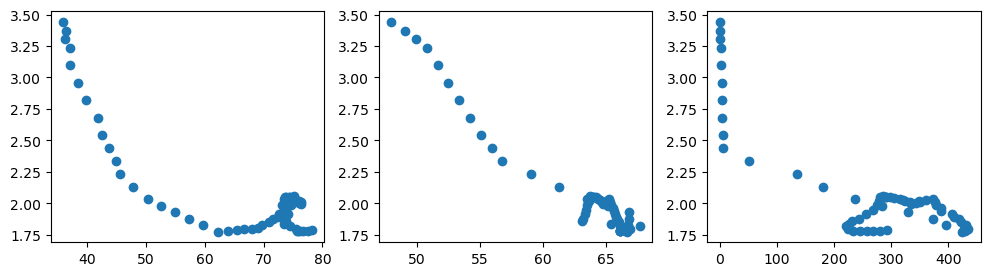

In [4]:
y=df.iloc[:,2]

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
# Flatten the axes array for easy iteration
axes = axes.flatten()
j=0;

for i in [3,9,10]:
    x=df.iloc[:,i]
    ax=axes[j]; j=j+1
    ax.plot(x, y, 'o')    

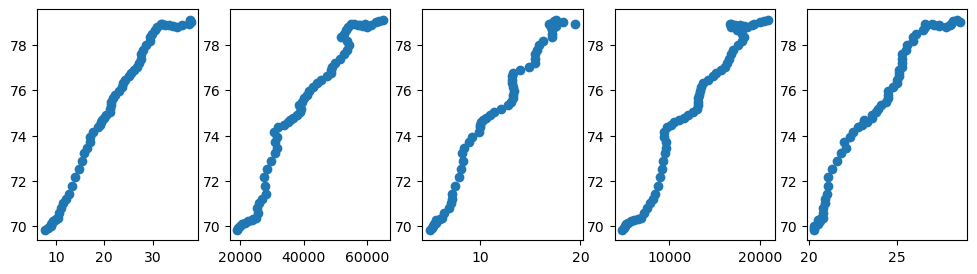

In [5]:
y=df.iloc[:,1]

fig, axes = plt.subplots(1, 5, figsize=(12, 3))
# Flatten the axes array for easy iteration
axes = axes.flatten()
j=0;

for i in [4,5,6,7,8]:
    x=df.iloc[:,i]
    ax=axes[j]; j=j+1
    ax.plot(x, y, 'o')    

In [6]:
from scipy.optimize import curve_fit

def f(x,b1,b2,b3):
    return -b1*x**np.abs(b2)+b3

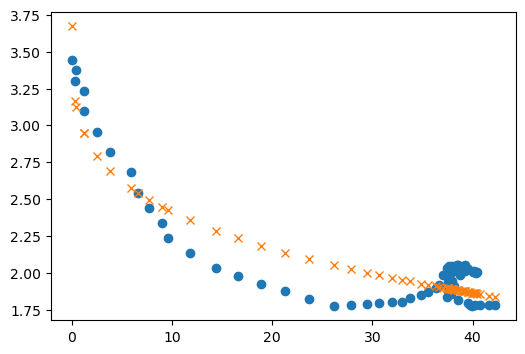

0.6926057435676546
0.26039976449429636
3.6729338558305207


In [7]:
# LF_Women

x=df.iloc[:,3]-min(df.iloc[:,3])
y=df.iloc[:,2]

popt, pcov = curve_fit(f, x, y,bounds=(0, [10, 1., 10]))
y_fit = f(x, *popt)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y, 'o')
ax.plot(x, y_fit, 'x')
plt.show()

b1=popt[0]; print(b1)
b2=popt[1]; print(b2)
print(popt[2])

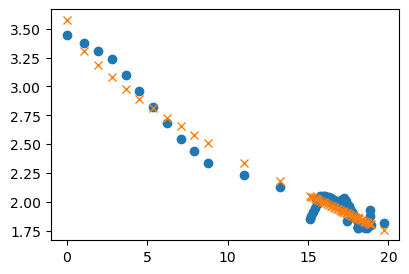

0.2512949583994008
0.6638735756794133
3.5767028055890746


In [8]:
# Contraceptive

x=df.iloc[:,9]-min(df.iloc[:,9])
y=df.iloc[:,2]

popt, pcov = curve_fit(f, x, y,bounds=(0, [50, 1., 50]))
y_fit = f(x, *popt)
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3))
ax.plot(x, y, 'o')
ax.plot(x, y_fit, 'x')
plt.show()

c1=popt[0]; print(c1)
c2=popt[1]; print(c2)
print(popt[2])

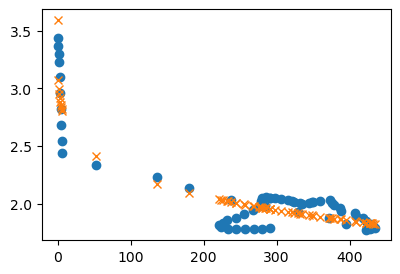

0.5624422131675976
0.18904234657591967
3.597172341305417


In [9]:
# Abortions

x=df.iloc[:,10]-min(df.iloc[:,10])
y=df.iloc[:,2]

popt, pcov = curve_fit(f, x, y,bounds=(0, [50, 1., 50]))
y_fit = f(x, *popt)
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3))
ax.plot(x, y, 'o')
ax.plot(x, y_fit, 'x')
plt.show()

d1=popt[0]; print(d1)
d2=popt[1]; print(d2)
print(popt[2])

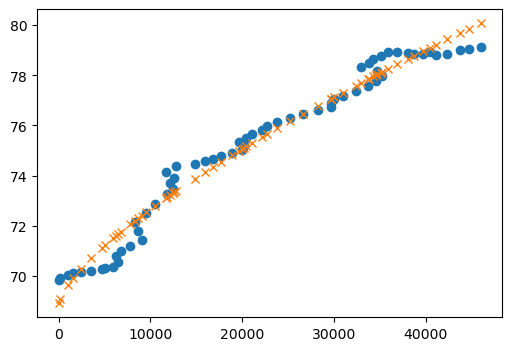

-0.005251124882856361
0.7136526173390831
68.90610757066963


In [10]:
# GDPC

x=df.iloc[:,5]-min(df.iloc[:,5])

y=df.iloc[:,1]

popt, pcov = curve_fit(f, x, y,bounds=([-100, 0, -100], [10, 10, 100]))
y_fit = f(x, *popt)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y, 'o')
ax.plot(x, y_fit, 'x')
plt.show()

e1=popt[0]; print(e1)
e2=popt[1]; print(e2)
print(popt[2])

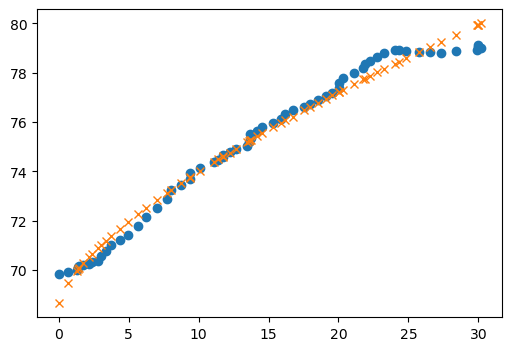

-1.1013449970812248
0.6844195704466601
68.65626360298643


In [11]:
# BS

x=df.iloc[:,4]-min(df.iloc[:,4])

y=df.iloc[:,1]

popt, pcov = curve_fit(f, x, y,bounds=([-100, 0, -100], [10, 10, 100]))
y_fit = f(x, *popt)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y, 'o')
ax.plot(x, y_fit, 'x')
plt.show()

f1=popt[0]; print(f1)
f2=popt[1]; print(f2)
print(popt[2])

In [12]:
#df['LF_T']=(df.iloc[:,3]-min(df.iloc[:,3]))**b2
#df['Contraceptive_T']=(df.iloc[:,9]-min(df.iloc[:,9]))**c2
#df['Abortions_T']=df.iloc[:,10]**d2

#df.drop(['LF_Women','Contraceptive','Abortions'], axis=1,inplace=True)

#We will add GDPC2 and Edu2 as needed
#df['GDPC2']=(df.iloc[:,5]-18991.5)**e2
#df['Edu2']=(df.iloc[:,4]-7.65)**f2
# Correlation matrix
#dff=df.iloc[:,[2,8,9,10]]
#corr=dff.corr()
#corr

In [13]:
df['LF2']=(df.iloc[:,3]-min(df.iloc[:,3]))**b2
df['C2']=(df.iloc[:,9]-min(df.iloc[:,9]))**c2
df['A2']=df.iloc[:,10]**d2

df.drop(['LF_Women','Contraceptive','Abortions'], axis=1,inplace=True)

#We will add GDPC2 and Edu2 as needed
#df['GDPC2']=(df.iloc[:,5]-18991.5)**e2
#df['Edu2']=(df.iloc[:,4]-7.65)**f2
# Correlation matrix

corr=df.corr()
corr

,Year,Life_Exp,Fertility,BS_Both,GDPC_2015,Health_GDP,Education_pp,Marriage_W,LF2,C2,A2
Year,1.000000,0.987034,-0.648866,0.997180,0.995632,0.991326,0.991397,0.992963,0.766005,0.628199,0.575810
Life_Exp,0.987034,1.000000,-0.680778,0.980662,0.976537,0.987823,0.979809,0.976884,0.809659,0.671052,0.639030
Fertility,-0.648866,-0.680778,1.000000,-0.641286,-0.612195,-0.621690,-0.644392,-0.601560,-0.931158,-0.980498,-0.942142
BS_Both,0.997180,0.980662,-0.641286,1.000000,0.992860,0.984861,0.986309,0.994105,0.749880,0.618696,0.562227
GDPC_2015,0.995632,0.976537,-0.612195,0.992860,1.000000,0.983228,0.992516,0.988438,0.738384,0.592653,0.537931
Health_GDP,0.991326,0.987823,-0.621690,0.984861,0.983228,1.000000,0.987297,0.984168,0.759423,0.609744,0.569262
Education_pp,0.991397,0.979809,-0.644392,0.986309,0.992516,0.987297,1.000000,0.979108,0.773896,0.634204,0.589709
Marriage_W,0.992963,0.976884,-0.601560,0.994105,0.988438,0.984168,0.979108,1.000000,0.729431,0.582447,0.528265
LF2,0.766005,0.809659,-0.931158,0.749880,0.738384,0.759423,0.773896,0.729431,1.000000,0.947424,0.935097
C2,0.628199,0.671052,-0.980498,0.618696,0.592653,0.609744,0.634204,0.582447,0.947424,1.000000,0.974406


Lasso model as an example - Will not use

In [14]:
# Life Expectancy
X = df.iloc[:, 3:]
y = df.iloc[:, 1]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_norm = normalize(X, norm='l2')

np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})

lasso = Lasso(alpha=0.1)
lasso.fit(X_std, y)
print(lasso.coef_)

[0.436669 0.087830 1.932387 0.000000 0.265676 0.261666 0.000000 0.108575]


In [15]:
# Fertility Rate
X = df.iloc[:, 3:]
y = df.iloc[:, 2]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_norm = normalize(X, norm='l2')

np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})

lasso = Lasso(alpha=0.002)
lasso.fit(X_std, y)
print(lasso.coef_)

[-0.038820 -0.000000 0.000000 0.017691 0.000000 0.000000 -0.408862
 0.010781]


### Best Models: 
We obtain the best model by minimizing BIC.

In [16]:
import itertools

# Best subset by minimizing sum of residuals
def best_subset_selection_SumRes(X, y, k):
    best_model = None
    best_rss = float('inf')

    for combo in itertools.combinations(X.columns, k):
        X0=X[list(combo)]; 
        # Add if wish to select the variables using centered models
        # X0 = sm.add_constant(X0)
        model = sm.OLS(y, X0).fit()
        rss = ((model.predict(X[list(combo)]) - y) ** 2).sum()

        if rss < best_rss:
            best_model = model
            best_rss = rss

    return best_model

# Best subset by minimizing BIC
def best_subset_selection_BIC(X, y, k):
    best_model = None
    best_BIC = float('inf')

    for combo in itertools.combinations(X.columns, k):
        X0=X[list(combo)]; 
        # Add if wish to select the variables using centered models
        # X0 = sm.add_constant(X0)
        model = sm.OLS(y, X0).fit()

        BIC=model.bic
        if BIC < best_BIC:
            best_model = model
            best_BIC = BIC

    return best_model

In [17]:
# BIC model
X = df.iloc[:, 3:]
#X = sm.add_constant(X)
y = df.iloc[:, 2] # FR

#p0=4; p1=11; n=p1-p0;
p0=2; p1=8; n=p1-p0;
M=np.zeros([n,1])


for k in range(p0,p1):
    best_model = best_subset_selection_BIC(X, y, k)
    M[k-p0] = best_model.bic

min_BIC = np.min(M)
min_index = np.argmin(M)

results = best_subset_selection_BIC(X, y, min_index+p0)
print(results.params)
print(results.bic)
print(results.rsquared_adj)
M

BS_Both        -0.083995
Education_pp    0.000050
Marriage_W      0.199252
LF2            -0.157549
C2             -0.188575
dtype: float64
-128.72213532577382
0.9986605436849814


array([[38.869066],
       [-124.471866],
       [-128.638708],
       [-128.722135],
       [-127.309846],
       [-123.252896]])

In [18]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              Fertility   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              9544.
Date:                Fri, 30 Jan 2026   Prob (F-statistic):                    2.04e-84
Time:                        08:39:38   Log-Likelihood:                          74.758
No. Observations:                  64   AIC:                                     -139.5
Df Residuals:                      59   BIC:                                     -128.7
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [19]:
# Use selected variables
#X = df.iloc[:, [4,7,8,9,12]]
X = df.iloc[:, [3,6,7,8,9]]
X = sm.add_constant(X)
y = df.iloc[:, 2] # FR
model = sm.OLS(y,X)
results = model.fit()
print(results.params)
print(results.bic)
print(results.summary())

const           1.719012
BS_Both        -0.053610
Education_pp    0.000044
Marriage_W      0.102716
LF2            -0.078948
C2             -0.217490
dtype: float64
-130.34051789083372
                            OLS Regression Results                            
Dep. Variable:              Fertility   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     386.6
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           3.51e-43
Time:                        08:39:39   Log-Likelihood:                 77.647
No. Observations:                  64   AIC:                            -143.3
Df Residuals:                      58   BIC:                            -130.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef  

In [20]:
# Jarque-Bera test for Normality of the residuals

name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', np.float64(3.619850196177469)),
 ('Chi^2 two-tail prob.', np.float64(0.16366639526942267)),
 ('Skew', np.float64(-0.4907604432369589)),
 ('Kurtosis', np.float64(3.6277424415968746))]

In [21]:
# Lagrange Multiplier Heteroscedasticity Test by Breusch-Pagan

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', np.float64(29.36576769762909)),
 ('p-value', np.float64(1.9654236485311336e-05)),
 ('f-value', np.float64(9.835439755630977)),
 ('f p-value', np.float64(7.615257812081245e-07))]

In [22]:
# Harvey-Collier multiplier test for linearity

#skip = len(results.params)  # bug in linear_harvey_collier
#rr = sms.recursive_olsresiduals(results, skip=skip, alpha=0.95, order_by=None)
#stats.ttest_1samp(rr[3][skip:], 0)

In [23]:
# Ljung-Box test for Autocorrelation

sm.stats.acorr_ljungbox(results.resid, lags=[1,2,3], return_df=True)

,lb_stat,lb_pvalue
1,32.816928,1.012592e-08
2,42.846266,4.966512e-10
3,43.633342,1.805598e-09


In [24]:
# BIC model
X = df.iloc[:, 3:9]
#X = sm.add_constant(X)
y = df.iloc[:, 1] # LE

p0=2; p1=7; n=p1-p0;
M=np.zeros([n,1])


for k in range(p0,p1):
    best_model = best_subset_selection_BIC(X, y, k)
    M[k-p0] = best_model.bic

min_BIC = np.min(M)
min_index = np.argmin(M)

results = best_subset_selection_BIC(X, y, min_index+p0)
print(results.params)
print(results.bic)
print(results.rsquared_adj)
M

BS_Both      -0.785805
Marriage_W    3.699466
LF2           1.644842
dtype: float64
190.96453713167588
0.9998230790179063


array([[208.752328],
       [190.964537],
       [193.531453],
       [197.413359],
       [201.125348]])

In [25]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Life_Exp   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.206e+05
Date:                Fri, 30 Jan 2026   Prob (F-statistic):                   5.26e-115
Time:                        08:39:48   Log-Likelihood:                         -89.244
No. Observations:                  64   AIC:                                      184.5
Df Residuals:                      61   BIC:                                      191.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [26]:
# Use selected variables Regression Model
# X = df.iloc[:, [3,4,5,6,7,9,10,11,12,15]]
X = df.iloc[:, [3,4,8]]
X = sm.add_constant(X)
y = df.iloc[:, 1] # LE
model = sm.OLS(y,X)
results = model.fit()
print(results.params)
print(results.bic)
print(results.summary())

const        65.850080
BS_Both       0.203369
GDPC_2015     0.000064
LF2           0.952532
dtype: float64
106.33238248742397
                            OLS Regression Results                            
Dep. Variable:               Life_Exp   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     792.7
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           3.34e-48
Time:                        08:39:49   Log-Likelihood:                -44.848
No. Observations:                  64   AIC:                             97.70
Df Residuals:                      60   BIC:                             106.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

In [27]:
# Jarque-Bera test for Normality of the residuals

name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', np.float64(2.3641488562869766)),
 ('Chi^2 two-tail prob.', np.float64(0.3066419716298919)),
 ('Skew', np.float64(-0.46717160048838324)),
 ('Kurtosis', np.float64(2.883558581698323))]

In [28]:
# Lagrange Multiplier Heteroscedasticity Test by Breusch-Pagan

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', np.float64(25.367638098422177)),
 ('p-value', np.float64(1.2935218021778786e-05)),
 ('f-value', np.float64(13.132843476176959)),
 ('f p-value', np.float64(1.0687588283674562e-06))]

In [29]:
# Harvey-Collier multiplier test for linearity

#skip = len(results.params)  # bug in linear_harvey_collier
#rr = sms.recursive_olsresiduals(results, skip=skip, alpha=0.95, order_by=None)
#stats.ttest_1samp(rr[3][skip:], 0)

In [30]:
# Ljung-Box test for Autocorrelation

sm.stats.acorr_ljungbox(results.resid, lags=[1,2,3], return_df=True)

,lb_stat,lb_pvalue
1,48.961138,2.610845e-12
2,84.977679,3.526399e-19
3,106.270717,6.962808e-23


### Vector autoregression model (VAR)
Model used to forecast Fertility Rate and Life Expectancy, showing strength of model as well as 50 year prediction from now. 

In [29]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

Fertility rates

Optimal Lag:  2 

Relative error for a 30-year prediction (1994–2023), calculated using just the initial 33 data points
[ 0.01198765  0.02134773  0.02786833  0.03317095  0.03724161  0.03207768
  0.02609464  0.01873653  0.01091124  0.00203595 -0.00496964 -0.01249896
 -0.0213336  -0.03026528 -0.0399676  -0.03133427 -0.02218685 -0.01228756
 -0.00143697  0.01052195  0.01487539  0.02008824  0.02559658  0.03249777
  0.04019782  0.03567387  0.03223258  0.02863577  0.02596972  0.02301407]
Maximum percentage error =  4.01978210810827 

Absolute error for a 30-year prediction (1994–2023), calculated using just the initial 33 data points
[0.02425101 0.04303703 0.05601535 0.06644141 0.07433425 0.06431575
 0.0525546  0.03792274 0.02218255 0.00415741 0.0101629  0.02558537
 0.04373388 0.06210436 0.08213342 0.06326388 0.04399653 0.02392389
 0.00274605 0.01972865 0.02759385 0.03686193 0.04648339 0.05836599
 0.07139133 0.06342814 0.05734177 0.0510003  0.04627805 0.04105711] 



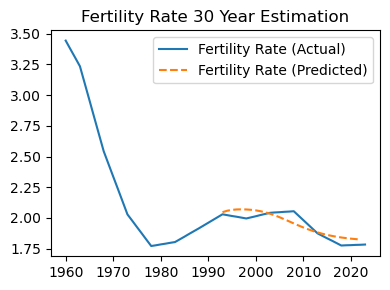

50 year forecast
[1.78649259 1.78951547 1.7909655  1.7906079  1.78860631 1.78576998
 1.78287968 1.78057309 1.77916655 1.77868917 1.77893839 1.77958512
 1.7802631  1.78064179 1.78046868 1.77958694 1.7779324  1.77551806
 1.77241228 1.76871614 1.76454344 1.76000529 1.75520015 1.75020873
 1.74509316 1.73989887 1.73465817 1.7293941  1.72412401 1.71886213
 1.71362113 1.70841275 1.70324758 1.69813462 1.69308059 1.68808945
 1.68316214 1.67829669 1.67348848 1.66873083 1.66401559 1.65933382
 1.6546763  1.65003408 1.64539878 1.64076282 1.63611954 1.63146323
 1.62678913 1.62209334]
Rate will reach 1.75 by 2047.


In [42]:
# Selected variables
# data = df.iloc[:, [2,4,7,8,9,12]]
data = df.iloc[:, [2,3,6,7,8,9]]

model = VAR(data)
results = model.fit(maxlags=3, ic='bic')
lag_order = results.k_ar
print('Optimal Lag: ',lag_order,'\n')

k=30
A1=results.forecast(data.values[:-k], k)
A2=df.iloc[-k:,2].values
print('Relative error for a 30-year prediction (1994–2023), calculated using just the initial 33 data points')
print((A1[:,0]-A2)/A2)
print('Maximum percentage error = ', max(abs(100*(A1[:,0]-A2)/A2)), '\n')

print('Absolute error for a 30-year prediction (1994–2023), calculated using just the initial 33 data points')
print(np.abs(A1[:,0]-A2),'\n')
# Setting figure size
plt.figure(figsize=(4,3))

plt.plot(df['Year'], df['Fertility'], label="Fertility Rate (Actual)")
plt.plot(df['Year'][33:63], A1[:30, 0], '--', label="Fertility Rate (Predicted)")

plt.legend()
plt.title("Fertility Rate 30 Year Estimation")
plt.tight_layout()
plt.show()

print('50 year forecast')
k=50
A1=results.forecast(data.values, k)
A2=df.iloc[-k:,2].values
print(A1[:,0])
print('Rate will reach 1.75 by 2047.')

In [35]:
# Jarque-Bera test for Normality of the residuals

name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(results.resid.iloc[:,1])
lzip(name, test)

[('Jarque-Bera', np.float64(1.1834316191517167)),
 ('Chi^2 two-tail prob.', np.float64(0.553376980175173)),
 ('Skew', np.float64(0.16997169248364036)),
 ('Kurtosis', np.float64(3.5852700720772117))]

In [36]:
# Ljung-Box test for Autocorrelation

sm.stats.acorr_ljungbox(results.resid.iloc[:,1], lags=[1,2,3], return_df=True)

,lb_stat,lb_pvalue
1,0.168845,0.681140
2,2.804434,0.246051
3,5.020346,0.170313


In [37]:
# Heteroscedasticity Test

sm.tsa.stattools.breakvar_heteroskedasticity_test(
    results.resid.iloc[:,1], subset_length=0.3333333333333333, alternative='two-sided', use_f=True)

(np.float64(3.7579289178493984), np.float64(0.0037451215327998478))

In [38]:
#results.plot_forecast(10)
#plt.show()

Life Expectancy

Optimal Lag:  2 

Relative error for a 30-year prediction (1994–2023), calculated using just the initial 33 data points
[-1.80100958e-04 -5.48930953e-04 -8.32790942e-04 -1.28295587e-03
 -1.62937565e-03 -1.73613992e-03 -1.86021331e-03 -2.12783850e-03
 -2.27677729e-03 -2.43545315e-03 -3.37629213e-03 -4.32118863e-03
 -5.39790884e-03 -6.35037845e-03 -7.30718710e-03 -7.63570161e-03
 -7.97288823e-03 -8.31906464e-03 -8.67450373e-03 -9.03941892e-03
 -7.15435178e-03 -5.40511296e-03 -3.53989142e-03 -1.81114299e-03
  3.41247225e-05  7.26383452e-04  1.40655830e-03  2.07481188e-03
  2.73132404e-03  3.37628530e-03]
Maximum percentage error =  0.9039418918464552 

Absolute error for a 30-year prediction (1994–2023), calculated using just the initial 33 data points
[0.01365345 0.04170777 0.0634087  0.09790236 0.12459836 0.13300568
 0.14277137 0.16363078 0.17540292 0.18796827 0.26125748 0.33523781
 0.41990333 0.49526602 0.57134896 0.59818086 0.625792   0.65421124
 0.68346415 0.71357173 0.5645499  0.426

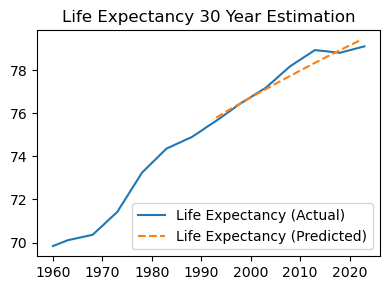

50 year forecast
[79.19689923 79.3110667  79.44600333 79.59466643 79.75093451 79.90983107
 80.06759488 80.22154547 80.36993254 80.5117586  80.64661645 80.77453972
 80.89587522 81.01117564 81.12111309 81.2264113  81.32779467 81.42595192
 81.52151169 81.6150282  81.70697459 81.79774215 81.88764391 81.97692102
 82.06575094 82.15425645 82.24251491 82.33056711 82.41842546 82.50608137
 82.59351152 82.68068319 82.76755853 82.8540979  82.94026242 83.02601576
 83.11132529 83.19616276 83.28050459 83.36433184 83.44762997 83.53038849
 83.61260045 83.69426193 83.77537159 83.85593008 83.93593968 84.01540385
 84.09432687 84.17271358]
Life expectancy will reach around 84 after 50 years from now.


In [41]:
#Selected variables
data = df.iloc[:, [1,3,4,8]]

model = VAR(data)
results = model.fit(maxlags=3, ic='bic')
lag_order = results.k_ar
print('Optimal Lag: ',lag_order,'\n')

k=30
A1=results.forecast(data.values[:-k], k)
A2=df.iloc[-k:,1].values
print('Relative error for a 30-year prediction (1994–2023), calculated using just the initial 33 data points')
print((A1[:,0]-A2)/A2)
print('Maximum percentage error = ', max(abs(100*(A1[:,0]-A2)/A2)), '\n')

print('Absolute error for a 30-year prediction (1994–2023), calculated using just the initial 33 data points')
print(np.abs(A1[:,0]-A2),'\n')

plt.figure(figsize=(4, 3))

# Plot actual data
plt.plot(df['Year'], df['Life_Exp'], label="Life Expectancy (Actual)")

# Plot predicted data (adjust A2 if that's the VAR output for life expectancy)
plt.plot(df['Year'][33:63], A1[:30, 0], '--', label="Life Expectancy (Predicted)")

plt.legend()
plt.title("Life Expectancy 30 Year Estimation")
plt.tight_layout()
plt.show()

print('50 year forecast')
k=50
A1=results.forecast(data.values, k)
A2=df.iloc[-k:,1].values
print(A1[:,0])
print('Life expectancy will reach around 84 after 50 years from now.')

In [53]:
# Jarque-Bera test for Normality of the residuals

name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(results.resid.iloc[:,1])
lzip(name, test)

[('Jarque-Bera', 1.149990594323141),
 ('Chi^2 two-tail prob.', 0.5627075151232599),
 ('Skew', 0.25302585120634763),
 ('Kurtosis', 3.4348210251363454)]

In [54]:
# Ljung-Box test for Autocorrelation

sm.stats.acorr_ljungbox(results.resid.iloc[:,1], lags=[1,2,3], return_df=True)

,lb_stat,lb_pvalue
1,0.147070,0.701351
2,0.980345,0.612521
3,1.016903,0.797162


In [55]:
# Heteroscedasticity Test

sm.tsa.stattools.breakvar_heteroskedasticity_test(
    results.resid.iloc[:,1], subset_length=0.3333333333333333, alternative='two-sided', use_f=True)

(2.4965020362763055, 0.04161169318497811)

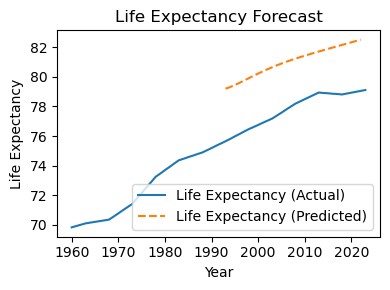

In [57]:
plt.figure(figsize=(4, 3))

# Plot actual data
plt.plot(df['Year'], df['Life_Exp'], label="Life Expectancy (Actual)")

# Plot predicted data (adjust A2 if that's the VAR output for life expectancy)
plt.plot(df['Year'][33:63], A1[:30, 0], '--', label="Life Expectancy (Predicted)")

plt.legend()
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy Forecast")
plt.tight_layout()
plt.show()

Some Graphing

In [43]:
df['Year'] = pd.to_datetime(df['Year'].astype(str), format='%Y')

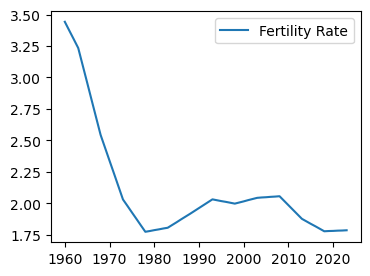

In [50]:
# Setting figure size
plt.figure(figsize=(4,3))

# Plot original sales data
plt.plot(df['Year'], df['Fertility'], label="Fertility Rate")
# Rotate xlabels
#plt.xticks(rotation=60)
# Add legends
plt.legend()
#display the plot
plt.show()

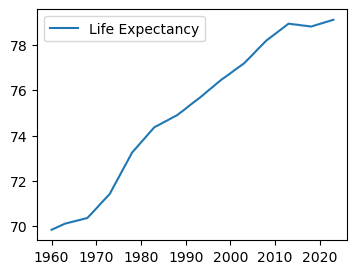

In [45]:
# Setting figure size
plt.figure(figsize=(4,3))

# Plot original sales data
plt.plot(df['Year'], df['Life_Exp'], label="Life Expectancy")
# Rotate xlabels
#plt.xticks(rotation=60)
# Add legends
plt.legend()
#display the plot
plt.show()